**Importing Necessary Libraries**

In [1]:
import re
import pandas as pd
import numpy as np
import nltk

In [2]:
from nltk.corpus import stopwords

**Fetching the data** (the data has been preprocessed already)

Preprocessing steps include: 
1. Lemmatization
2. Stop Word Removal
3. Removing html tags and urls

In [3]:
from google.colab import files
data = files.upload()

Saving Final_data.csv to Final_data.csv


In [4]:
data = pd.read_csv('Final_data.csv')

**Preparing the data**

In [15]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

In [6]:
reviews = data['Reviews'].values
labels = data['sentiment'].values
encoder = LabelEncoder()
encoded_labels = encoder.fit_transform(labels)

In [16]:
vectorizer = TfidfVectorizer()
reviews = vectorizer.fit_transform(reviews)

In [17]:
X_train, X_test, train_labels, test_labels = train_test_split(reviews, encoded_labels, stratify = encoded_labels)

**Creating the model architecture**

In [10]:
from sklearn.naive_bayes import MultinomialNB

In [18]:
from sklearn.model_selection import GridSearchCV
parameters = {"alpha": [0.2,0.1,1,2,5,10]}

In [19]:
grid = GridSearchCV(MultinomialNB(), param_grid=parameters)
grid.fit(X_train,train_labels)

GridSearchCV(estimator=MultinomialNB(),
             param_grid={'alpha': [0.2, 0.1, 1, 2, 5, 10]})

In [20]:
pd.DataFrame(grid.cv_results_)[['params','mean_test_score']].sort_values(by="mean_test_score", ascending=False)

,params,mean_test_score
2,{'alpha': 1},0.863013
3,{'alpha': 2},0.861947
0,{'alpha': 0.2},0.861120
1,{'alpha': 0.1},0.859520
4,{'alpha': 5},0.859013
5,{'alpha': 10},0.855173


In [21]:
parameters_f = {"alpha": [0.2,0.4,0.6,0.8,1]}

In [22]:
grid_final = GridSearchCV(MultinomialNB(), param_grid=parameters_f)
grid_final.fit(X_train,train_labels)

GridSearchCV(estimator=MultinomialNB(),
             param_grid={'alpha': [0.2, 0.4, 0.6, 0.8, 1]})

In [23]:
pd.DataFrame(grid_final.cv_results_)[['params','mean_test_score']].sort_values(by="mean_test_score", ascending=False)

,params,mean_test_score
3,{'alpha': 0.8},0.863040
4,{'alpha': 1},0.863013
2,{'alpha': 0.6},0.862533
1,{'alpha': 0.4},0.862080
0,{'alpha': 0.2},0.861120


In [27]:
alpha = grid_final.best_params_['alpha']

In [28]:
multinb_clf = MultinomialNB(alpha = alpha)   #creating an instance of the class
multinb_clf.fit(X_train, train_labels)

MultinomialNB(alpha=0.8)

In [33]:
pred_probs = multinb_clf.predict_proba(X_test)

**Predictions on the test data (unseen data)**

In [31]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import fbeta_score, f1_score

In [34]:
pred_labels = []
for i in pred_probs[:,1]:
    if i >= 0.5:         #0.5 being the threshold values
        pred_labels.append(1)
    else:
        pred_labels.append(0)
print("Accuracy of prediction on test set : ", accuracy_score(test_labels,pred_labels))

Accuracy of prediction on test set :  0.86792


In [35]:
print(classification_report(test_labels,pred_labels))

              precision    recall  f1-score   support

           0       0.86      0.88      0.87      6250
           1       0.88      0.85      0.87      6250

    accuracy                           0.87     12500
   macro avg       0.87      0.87      0.87     12500
weighted avg       0.87      0.87      0.87     12500



In [36]:
f = fbeta_score(test_labels,pred_labels, beta=2)
f

0.8588345078353767

In [40]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [38]:
cf_matrix = confusion_matrix(test_labels, pred_labels)
print(cf_matrix)

[[5511  739]
 [ 912 5338]]


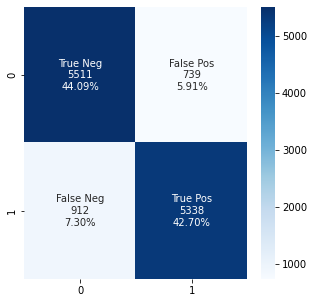

In [41]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

f = plt.figure()
f.set_figwidth(5)
f.set_figheight(5)


sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

In [42]:
from sklearn.metrics import roc_auc_score

In [44]:
roc_score = roc_auc_score(test_labels,pred_labels)
roc_score

0.86792